In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

**NumPy (import numpy as np):** Provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

**Pandas (import pandas as pd):** Offers data structures and data analysis tools. It's perfect for handling and analyzing structured data.

**Seaborn (import seaborn as sns):** A statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**Matplotlib (import matplotlib.pyplot as plt):** A plotting library used for creating static, animated, and interactive visualizations in Python.

**SciPy (import scipy.stats as stats):** Used for scientific and technical computing. The stats module provides a large number of probability distributions and statistical functions.

**Scikit-learn** (from sklearn.model_selection import train_test_split, from sklearn.model_selection import cross_val_score, from sklearn.linear_model import LinearRegression, from sklearn.metrics import r2_score, from sklearn.preprocessing import PowerTransformer): A machine learning library that provides simple and efficient tools for data mining and data analysis. It includes:

**train_test_split:** Splits arrays or matrices into random train and test subsets.

**cross_val_score:** Evaluates a score by cross-validation.

**LinearRegression:** Implements linear regression.

**r2_score:** Computes the R^2 (coefficient of determination) regression score function.

**PowerTransformer:** Applies a power transform to make data more Gaussian-like.

In [11]:
df = pd.read_csv("concrete_data.csv")

In [13]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [15]:
df.shape

(1030, 9)

In [17]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [19]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [25]:
X = df.drop(columns=['Strength'])
Y = df.iloc[:,-1]

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [39]:
# Applying Regression without any transformation
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
r2_score(Y_test,y_pred)

0.6275531792314851

In [47]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,Y,scoring='r2'))

0.4609940491662866

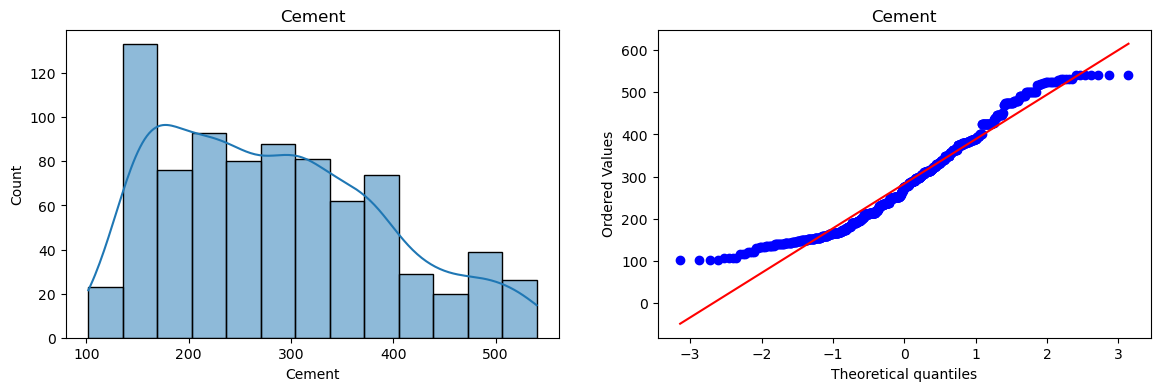

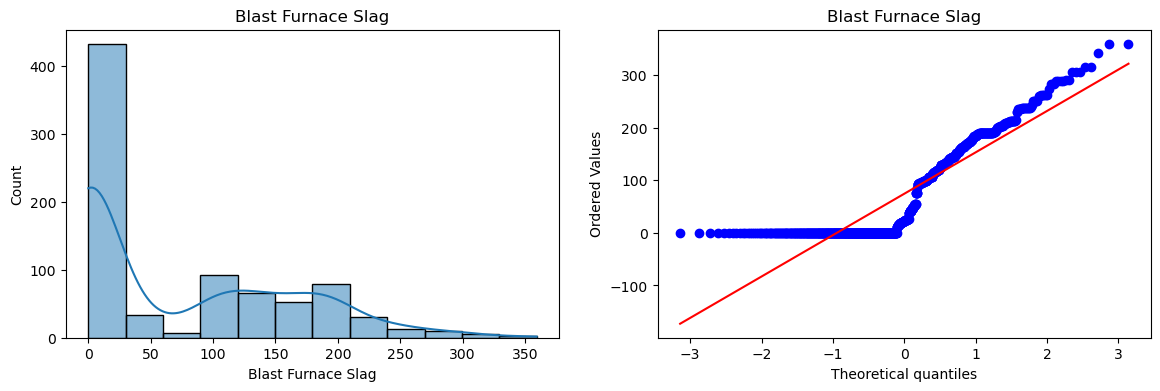

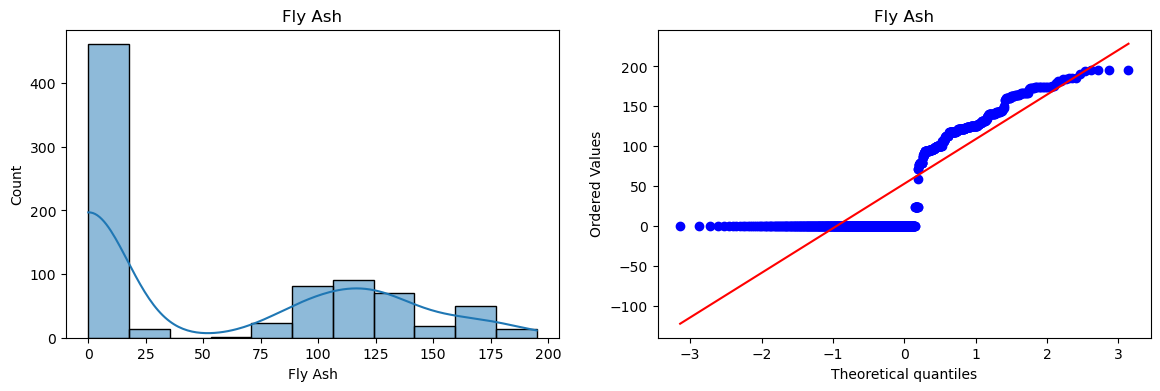

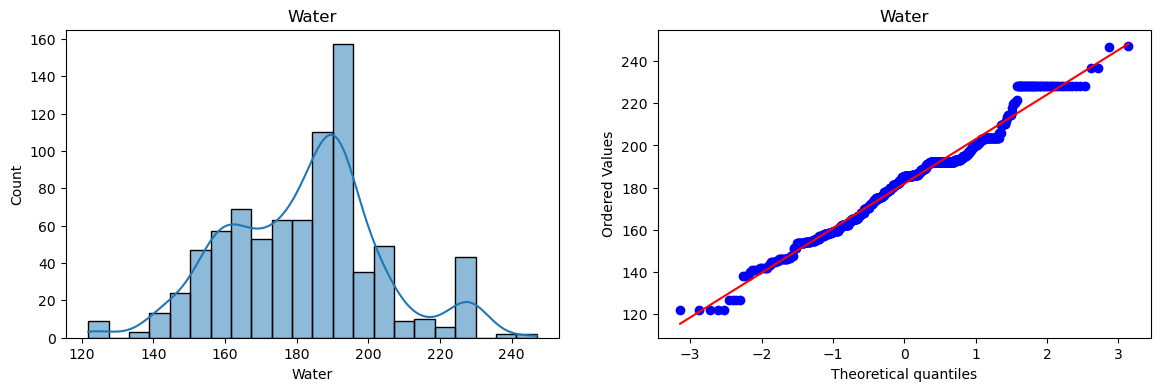

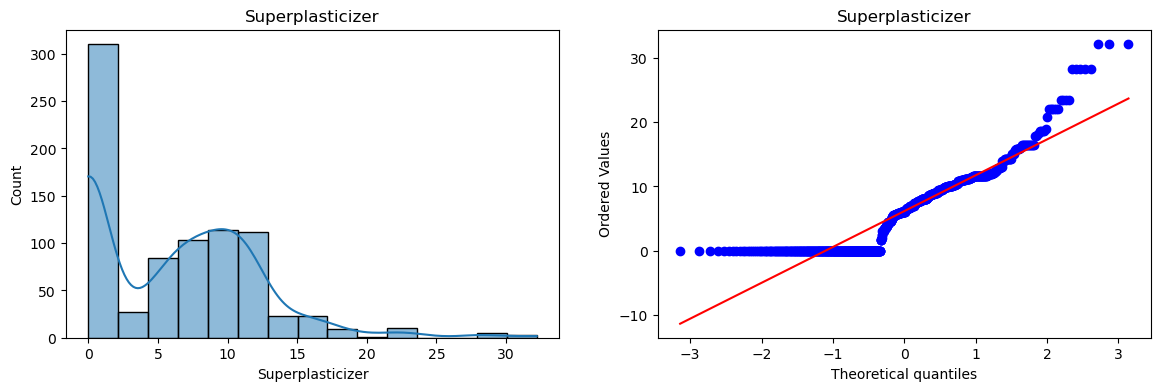

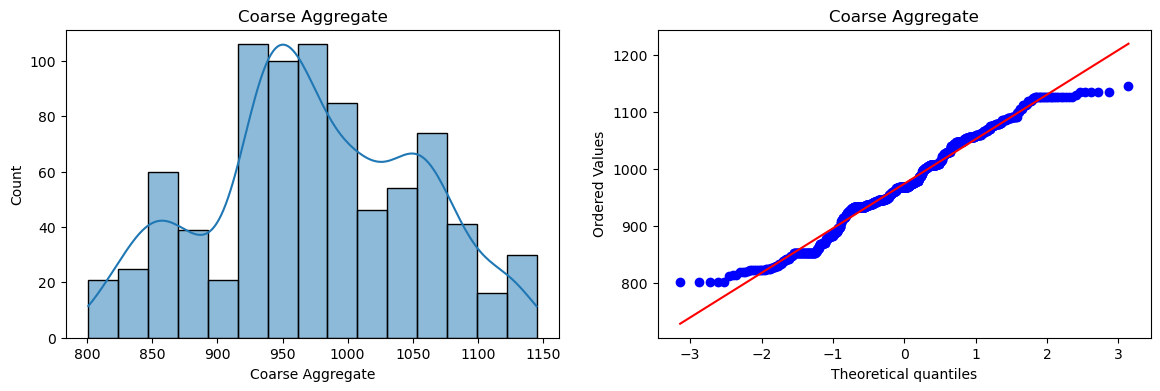

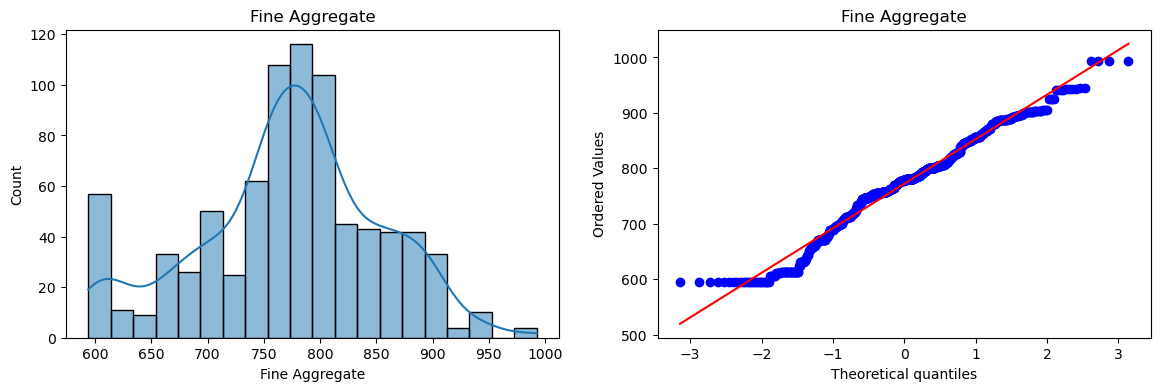

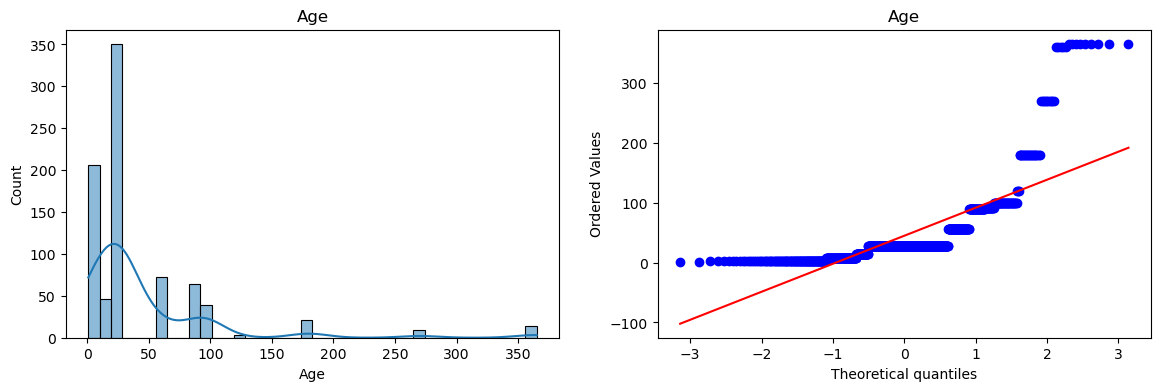

In [58]:
# Plotting the distplots without any transformation
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist="norm",plot=plt)
    plt.title(col)

    plt.show()

In [66]:
# Applying Box-Cox Transform
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train+0.000001)    
X_test_transformed = pt.transform(X_test+0.000001)    
pd.DataFrame({'cols':X_train.columns,'box_cox_lambda':pt.lambdas_})

,cols,box_cox_lambda
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [114]:
# Applying Linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,Y_train)
y_pred2 = lr.predict(X_test_transformed)
r2_score(Y_test,y_pred2)

0.8161906545593435

In [118]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.665853792684563

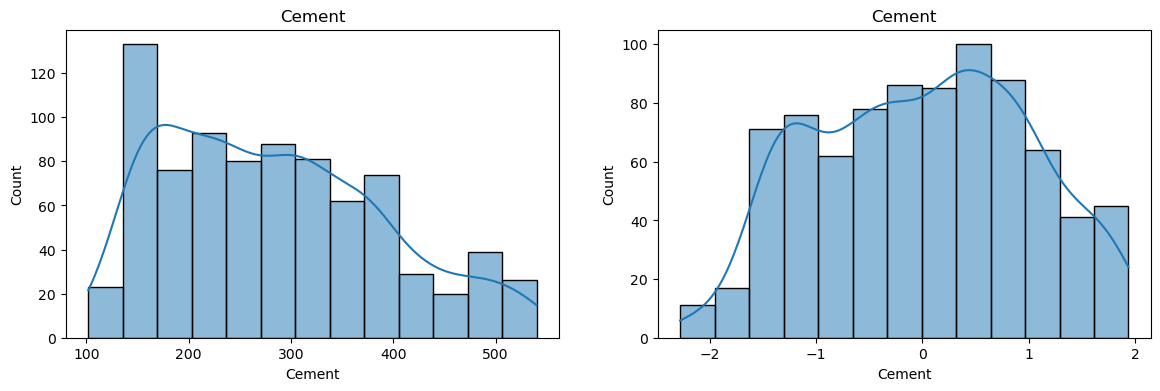

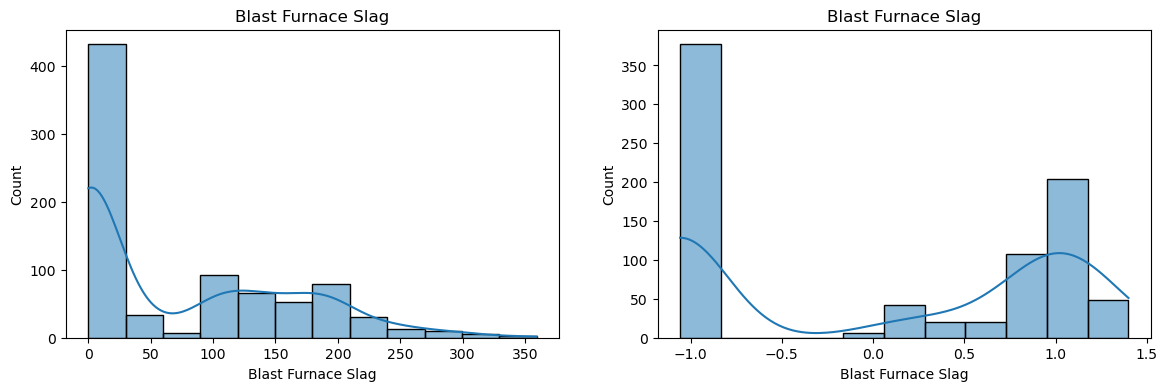

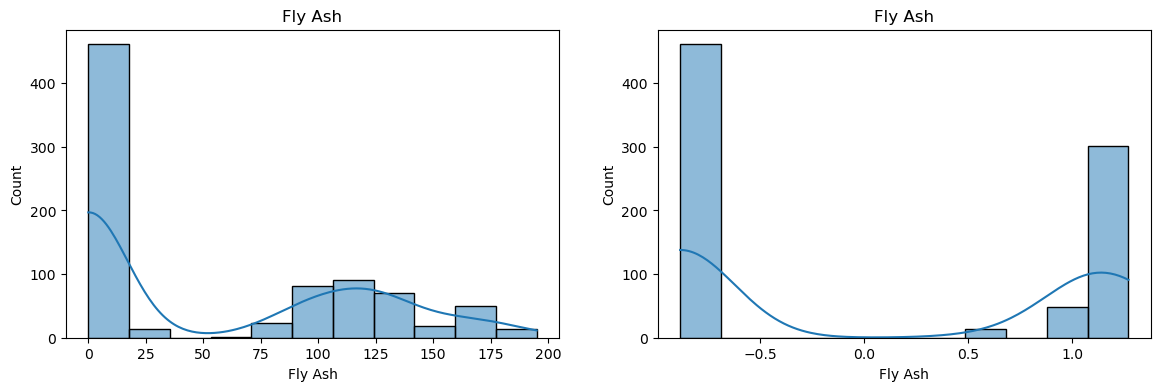

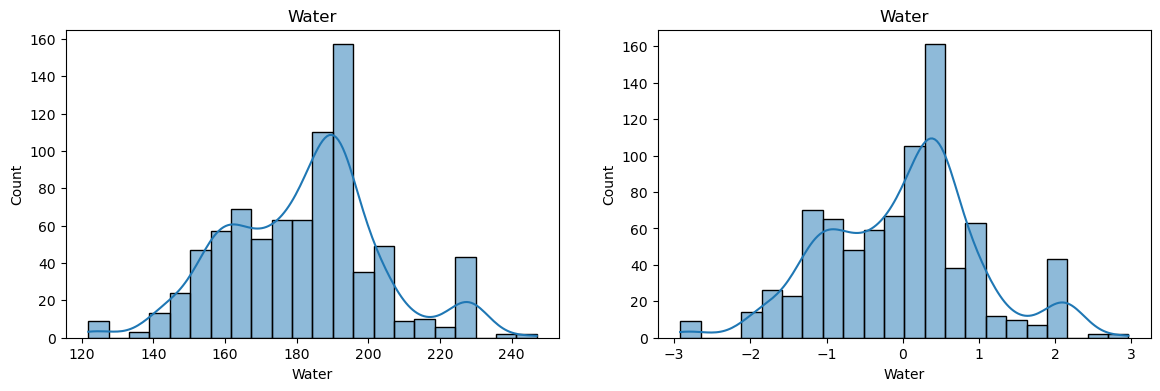

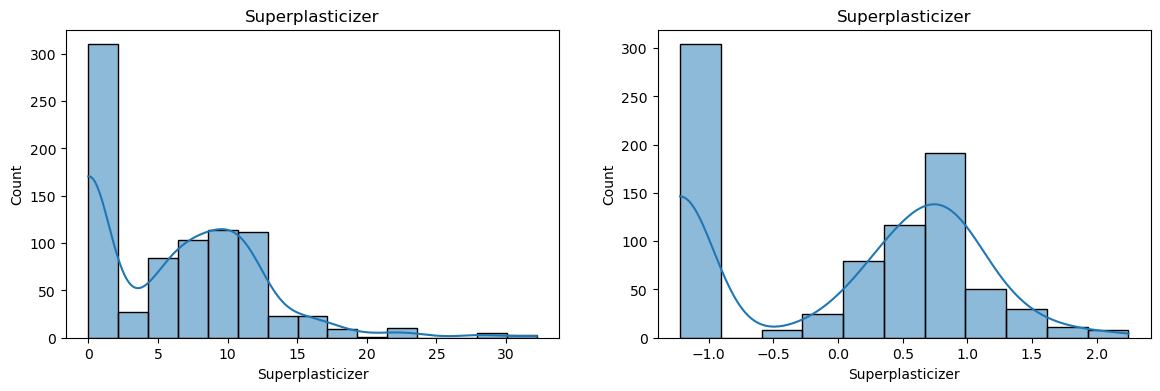

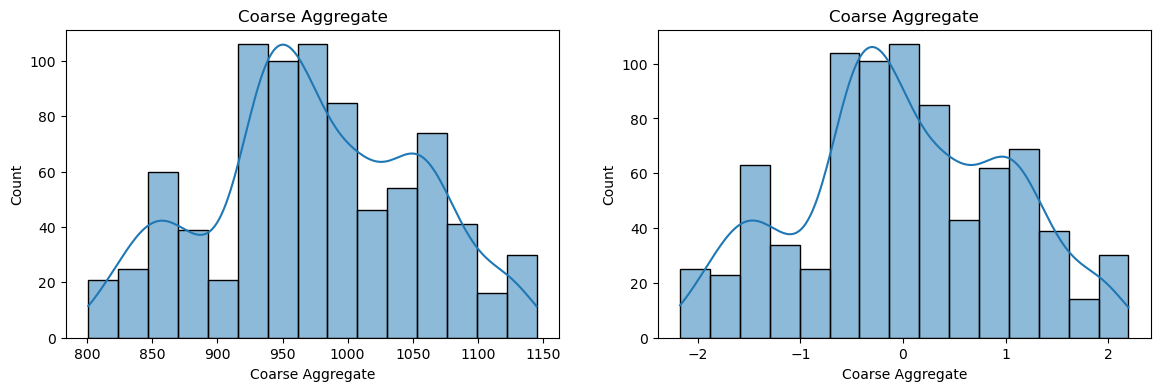

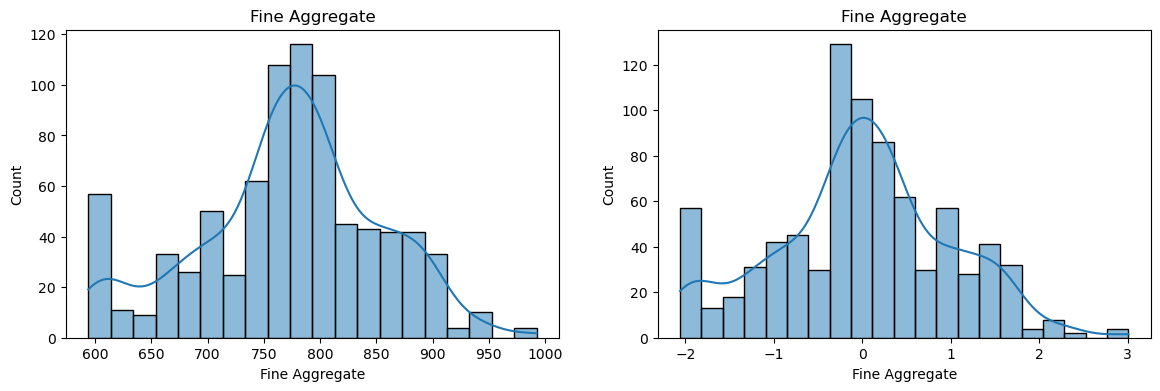

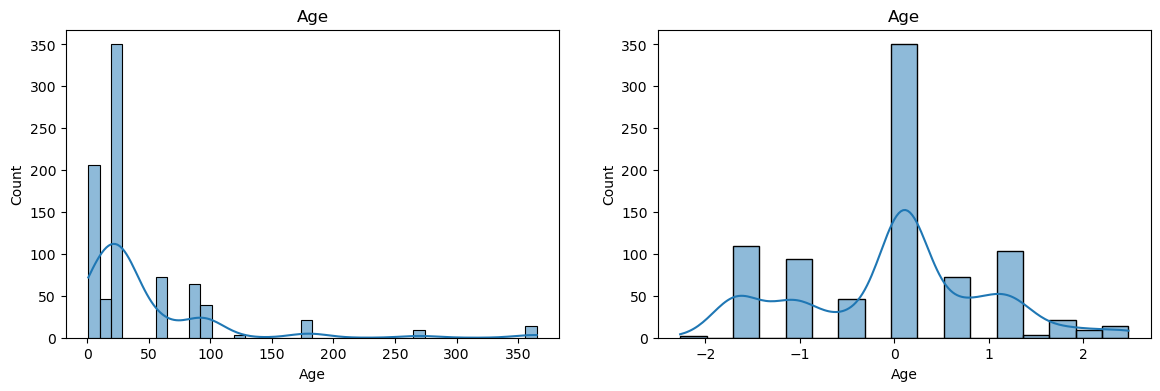

In [124]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(col)

    plt.show()

In [128]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,Y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(Y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906513354854


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [130]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625141500864

In [132]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

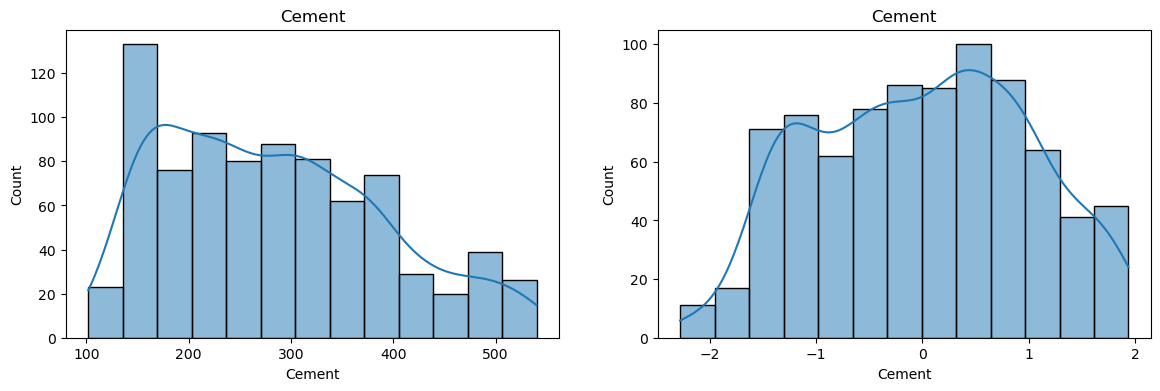

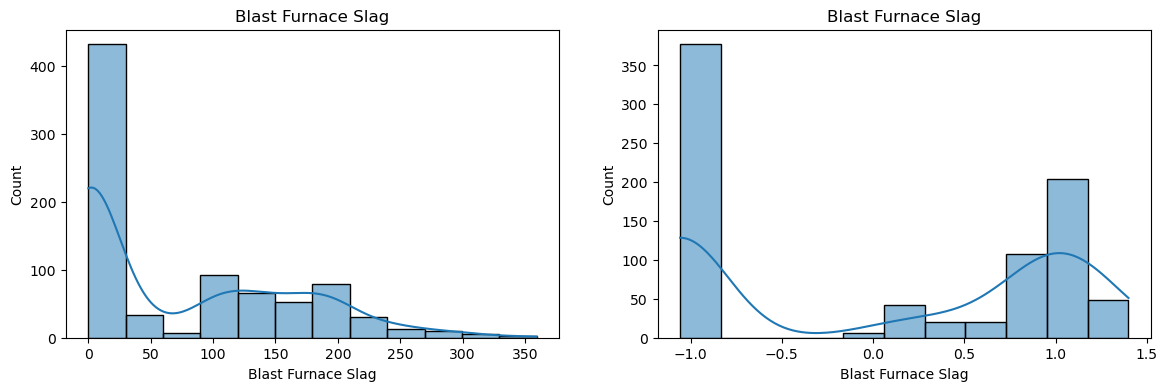

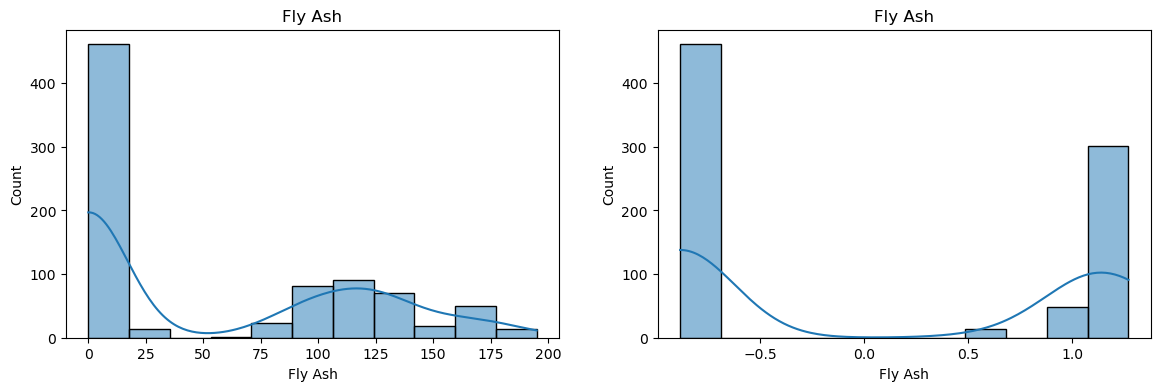

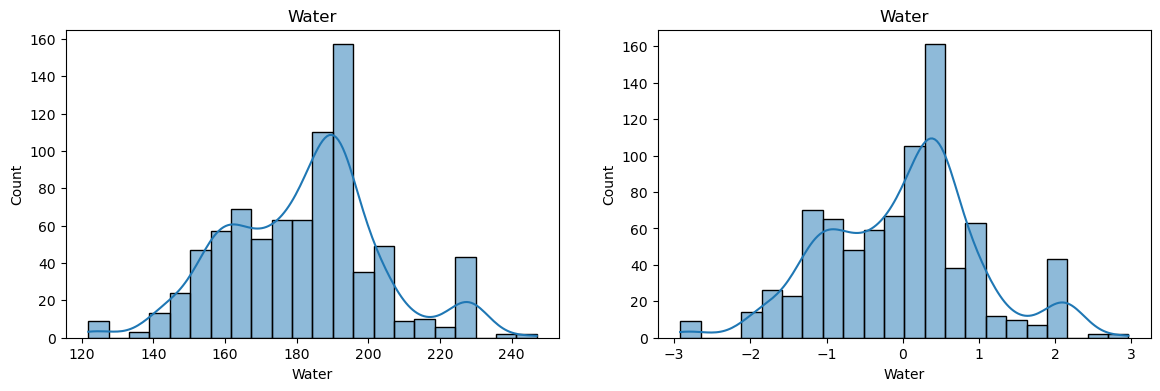

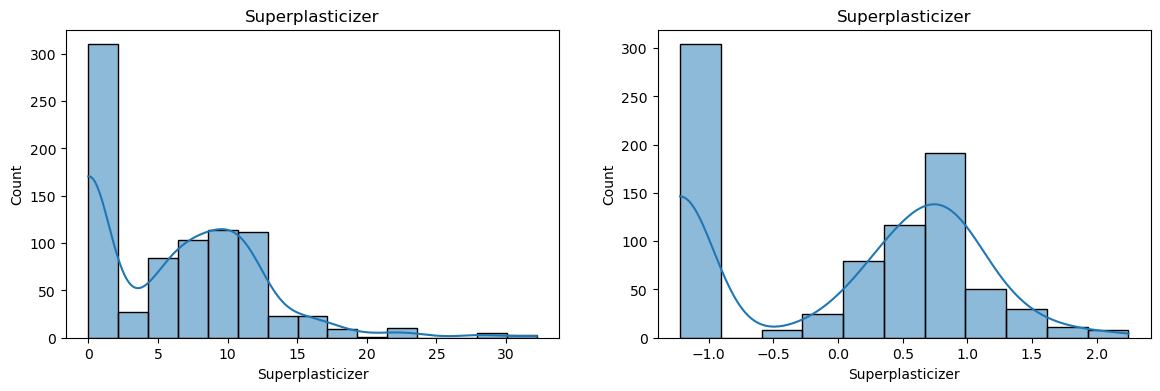

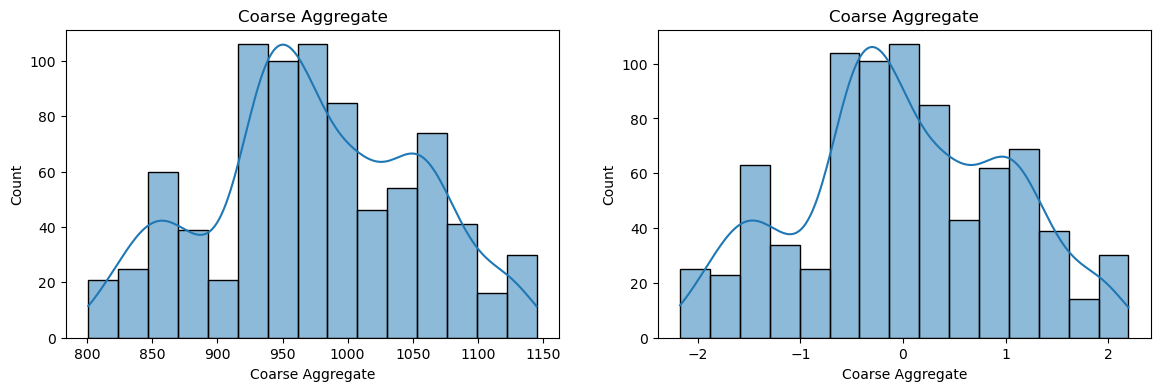

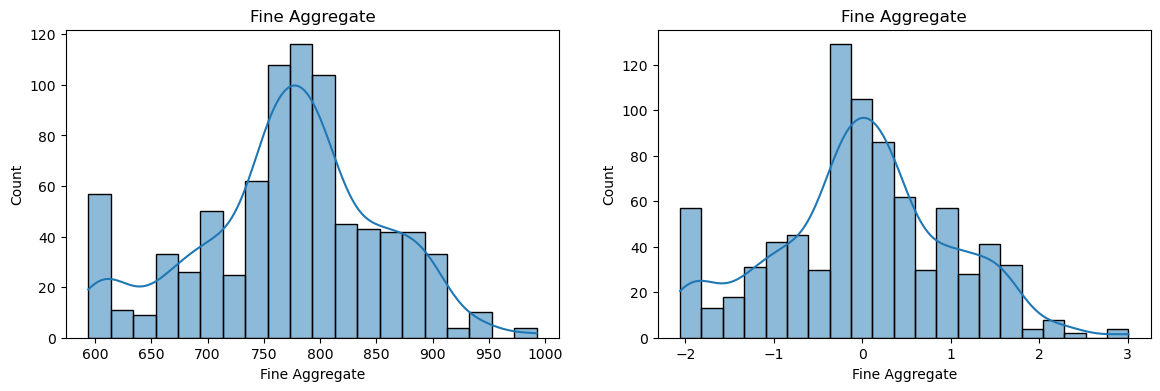

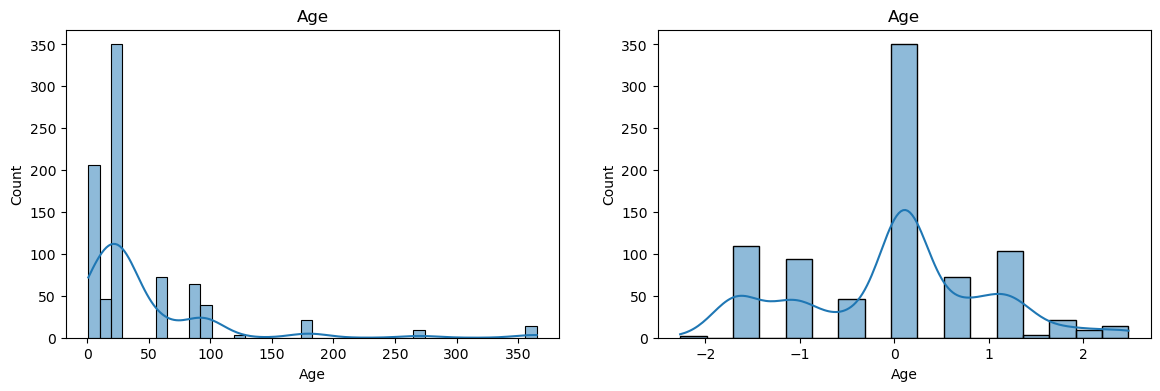

In [138]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col],kde=True)
    plt.title(col)

    plt.show()

In [140]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885
